In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import re
import konlpy
from wordcloud import WordCloud
from os import path
import requests 
from wordcloud import ImageColorGenerator
from collections import Counter
import nltk
import pickle
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\youtube_nodouble_unique.csv",lineterminator='\n')
df2017 = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\youtube_2017unique.csv",lineterminator='\n')
dfus = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\youtube_USunique.csv",lineterminator='\n')

df = df[['video_id','title','tags','category_name']]
df2017 = df2017[['video_id','title','tags','category_name']]
dfus = dfus[['video_id','title','tags','category_name']]

In [3]:
import matplotlib.font_manager as fm
path = 'C:\\Users\\lsj32\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


# title text 분석

category가 'Entertainment'인 경우에 대한 title 빈도분석을 먼저 진행하겠습니다!  

In [4]:
df['category_name'].unique()

array(['Entertainment', 'Film & Animation', 'People & Blogs', 'Music',
       'Comedy', 'Education', 'News & Politics', 'Sports',
       'Nonprofits & Activism', 'Gaming', 'Travel & Events',
       'Pets & Animals', 'Science & Technology', 'Howto & Style',
       'Autos & Vehicles'], dtype=object)

In [5]:
import matplotlib.font_manager as fm
path = 'C:\\Users\\lsj32\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [6]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lsj32\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]
titles_2017 = []
titles_us = []

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_entertainment = df[df['category_name']=='Comedy'].reset_index()
df_entertainment_2017 = df2017[df2017['category_name']=='Comedy'].reset_index()
df_entertainment_us = dfus[dfus['category_name']=='Comedy'].reset_index()

for i in range (0,len(df_entertainment)):
  titles.append(df_entertainment['title'][i]) #요소를 하나하나씩 list에 담습니다!
for i in range (0,len(df_entertainment_2017)):
  titles_2017.append(df_entertainment_2017['title'][i])
for i in range (0,len(df_entertainment_us)):
  titles_us.append(df_entertainment_us['title'][i])

In [8]:
print(len(df_entertainment))
print(len(df_entertainment_2017))
print(len(df_entertainment_us))

984
829
1409


In [9]:
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles_2017 = "".join(titles_2017)
titles_us = "".join(titles_us)
titles_us = re.sub(r'[^\.\?\!\w\d\s]','',titles_us)
titles_us = titles_us.lower()
print(titles_us)

when our generation gets old and hears a throwback song 5answering your assumptions about us... merrell twinssummer job! me and my best friend got an ice cream trucksurprising best friend with bubba gump shrimpmy decaying mind in quarantineuncle roger meet egg fried rice lady hersha patelswapping outfits with a drag queen!every drive thru evergrilled ribeye steak sausagewe secretly filmed the dolan twins  jeffs barbershopquesadillas  mexican survival guidei hate the i am not a robot verification.12 types of people on tiktoktipping delivery drivers 1000 dollars!!this is goodbyelet me inif 2020 gave us zombies instead of a pandemicif real people commercials were real life  chevy fuel efficiencygrizzly bearwhen you get on the grill for your friends birthdayhow hard fighting game combos used to bea zombie extras first day on set  key  peeledid late night tv change in 2020?surprising vlog squad with crazy tattoo game!!trump interview  a bad lip readingmail room  ep 16 delta farce  prehistor

In [10]:
#NanumBarunGothic체 파일을 드라이브에 저장해주시고 꼭 글씨체 위치를 지정해주셔야합니다!
#한국어가 지원되는 폰트로 지정해주세요! 저 같은 경우는 나눔바른고딕을 사용하였습니다.
FONT_PATH =  'C:\\Users\\lsj32\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'

## 미등록 단어 문제
Twitter (Okt) 이용

- ckonlpy에 들어있는 Twitter 모듈을 이용하면 사전을 직접 추가 가능
- add_dictionary 함수를 통해 추가하는 것은 메모리 상에 존재하는 임시 사전이므로 매번 새롭게 등록해야 함
(출처 : 20210715_텍스트마이닝.ipynb)

In [11]:
#!pip install customized_konlpy

In [12]:
from ckonlpy.tag import Twitter #customize  konlpy
twitter = Twitter()

C:\Users\lsj32\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [13]:
# 이 경우 위에서 한 번 출력해본 뒤에, 
# dictionary에 하나의 형태소라고 인식해야 하는 word들을 형태소에 맞춰서 넣어주세요!
twitter.add_dictionary(['오징어게임', '무한도전', '문명특급','유퀴즈','놀면 뭐하니','어몽어스','영국남자'], 'Noun')
title_pos = twitter.pos(titles)
title_pos_2017 = twitter.pos(titles_2017)
print(title_pos_2017)

[('슈퍼모델', 'Noun'), ('4', 'Number'), ('행시', 'Noun'), ('순발력', 'Noun'), ('실화', 'Noun'), ('냐', 'Josa'), ('ㅋㅋㅋㅋㅋㅋㅋㅋ', 'KoreanParticle'), ('____', 'Punctuation'), ('feat', 'Alpha'), ('.', 'Punctuation'), ('강호동', 'Noun'), ('The', 'Alpha'), ('MOST', 'Alpha'), ('DIFFICULT', 'Alpha'), ('Korean', 'Alpha'), ('SAT', 'Alpha'), ('English', 'Alpha'), ('+', 'Punctuation'), ('Maths', 'Alpha'), ('Questions', 'Alpha'), ('!!', 'Punctuation'), ('코트', 'Noun'), ('괴물', 'Noun'), ('취급', 'Noun'), ('하는', 'Verb'), ('여자', 'Noun'), ('만남', 'Noun'), ('개웃', 'Adverb'), ('긴', 'Verb'), ('약', 'Modifier'), ('빨방', 'Noun'), ('ㅋㅋㅋ', 'KoreanParticle'), ('(', 'Punctuation'), ('노래', 'Noun'), ('하는', 'Verb'), ('코트', 'Noun'), (')[', 'Punctuation'), ('리플', 'Noun'), (']', 'Punctuation'), ("'", 'Punctuation'), ('스', 'Noun'), ('미노', 'Noun'), ('프', 'Noun'), ('아이스', 'Noun'), ('톡', 'Noun'), ("'", 'Punctuation'), ('을', 'Josa'), ('마셔', 'Verb'), ('보았다', 'Verb'), ('!', 'Punctuation'), ('상큼', 'Noun'), ('하게', 'Verb'), ('마실', 'Verb'), ('수', 'Noun'

In [14]:
#nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles_us) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석
print(title_pos_us)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lsj32\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('when', 'WRB'), ('our', 'PRP$'), ('generation', 'NN'), ('gets', 'VBZ'), ('old', 'JJ'), ('and', 'CC'), ('hears', 'VBZ'), ('a', 'DT'), ('throwback', 'NN'), ('song', 'NN'), ('5answering', 'CD'), ('your', 'PRP$'), ('assumptions', 'NNS'), ('about', 'IN'), ('us', 'PRP'), ('...', ':'), ('merrell', 'VB'), ('twinssummer', 'JJ'), ('job', 'NN'), ('!', '.'), ('me', 'PRP'), ('and', 'CC'), ('my', 'PRP$'), ('best', 'JJS'), ('friend', 'NN'), ('got', 'VBD'), ('an', 'DT'), ('ice', 'NN'), ('cream', 'NN'), ('trucksurprising', 'VBG'), ('best', 'JJS'), ('friend', 'NN'), ('with', 'IN'), ('bubba', 'JJ'), ('gump', 'NN'), ('shrimpmy', 'NN'), ('decaying', 'VBG'), ('mind', 'NN'), ('in', 'IN'), ('quarantineuncle', 'NN'), ('roger', 'NN'), ('meet', 'NN'), ('egg', 'NN'), ('fried', 'VBD'), ('rice', 'NN'), ('lady', 'NN'), ('hersha', 'NN'), ('patelswapping', 'VBG'), ('outfits', 'NNS'), ('with', 'IN'), ('a', 'DT'), ('drag', 'NN'), ('queen', 'NN'), ('!', '.'), ('every', 'DT'), ('drive', 'NN'), ('thru', 'NN'), ('evergril

In [15]:
print(('무한도전','Noun') in title_pos)
print(('오징어게임','Noun') in title_pos)
print(('문명특급','Noun') in title_pos)
print(('유퀴즈','Noun') in title_pos)

False
True
False
False


## 형태소 분석

In [16]:
# 위에서와 동일하게 진행합니다!
# 혹시나 부사같은 것도 추가하는 게 좋겠다 싶으면 추가해주시면 됩니다.

title_f = list([word for word, pos in title_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])
title_f_2017 = list([word for word, pos in title_pos_2017 if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])
n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


In [18]:
#위에서와 동일하게 진행되지만, 위에서 확인한 더 필요없는 단어들을 추가적으로 확인해서 없애주세요.
#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words_kr = ['합니다','해주세요','한다','입니다','하는','하니','까지']
unique_title = set(title_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.
unique_title_2017 = set(title_f_2017) #중복되는 단어들을 없앤 버전이 unique_title입니다.
for word in unique_title:
    if word in stop_words_kr or len(word) == 1:
        while word in title_f:
            title_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
for word in unique_title_2017:
    if word in stop_words_kr or len(word) == 1:
        while word in title_f_2017:
            title_f_2017.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거

stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)

In [19]:
c = Counter(title_f)
c_2017 = Counter(title_f_2017)
c_us = Counter(n_v_a_word)

## 워드클라우드

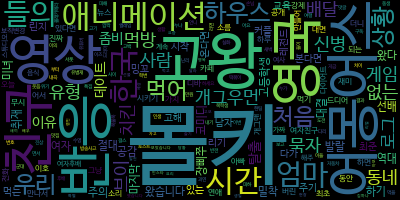

In [20]:
# 드디어 워드클라우드를 생성해보아요!
wordcloud = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)
wordcloud.generate_from_frequencies(c)
wordcloud.to_image()

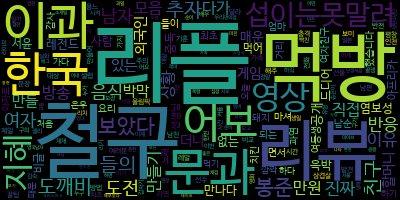

In [21]:
wordcloud_2017 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)
wordcloud_2017.generate_from_frequencies(c_2017)
wordcloud_2017.to_image()

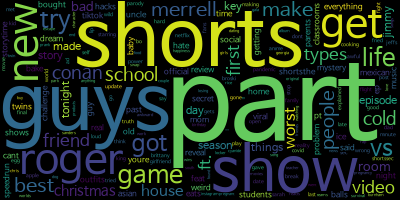

In [22]:
wordcloud_us = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)
wordcloud_us.generate_from_frequencies(c_us)
wordcloud_us.to_image()

영어는 대참사..... trailer 이런거만 있음 어쩌라고 !!!!!!!!

## 막대그래프 생성

In [23]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":title_f
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)


#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title_2017 = pd.DataFrame({
    "word":title_f_2017
})
tot_title_2017['count']=1
tot_title_2017 = tot_title_2017.groupby(by=['word'],as_index=False).count()
tot_title_2017 = tot_title_2017.sort_values(by='count',ascending=False).head(30)

tot_title_us = pd.DataFrame({
    "word":n_v_a_word
})

tot_title_us['count']=1
tot_title_us = tot_title_us.groupby(by=['word'],as_index=False).count()
tot_title_us = tot_title_us.sort_values(by='count',ascending=False).head(30)
tot_title_us

,word,count
1890,part,40
2382,shorts,36
1132,guys,35
2449,show,28
2210,roger,24
1775,new,24
1054,get,23
1017,game,23
1481,life,22
2903,try,22


In [24]:
tot_title_2017

,word,count
710,리플,68
2238,철구,57
814,먹방,49
704,리뷰,39
1851,이과,38
898,문과,37
2544,한국,32
1619,어보,31
1706,영상,25
2162,지혜,24


In [25]:
tot_title

,word,count
895,몰카,131
158,고왕,50
1010,반응,42
1684,어몽어스,40
1778,영상,37
2456,친구,35
1774,영국,35
1649,애니메이션,27
1471,시간,26
2700,한국,26


import matplotlib.font_manager as fm
path = '/content/drive/MyDrive/EDA/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

In [26]:
import seaborn as sns

<ipython-input-27-701081037421>:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


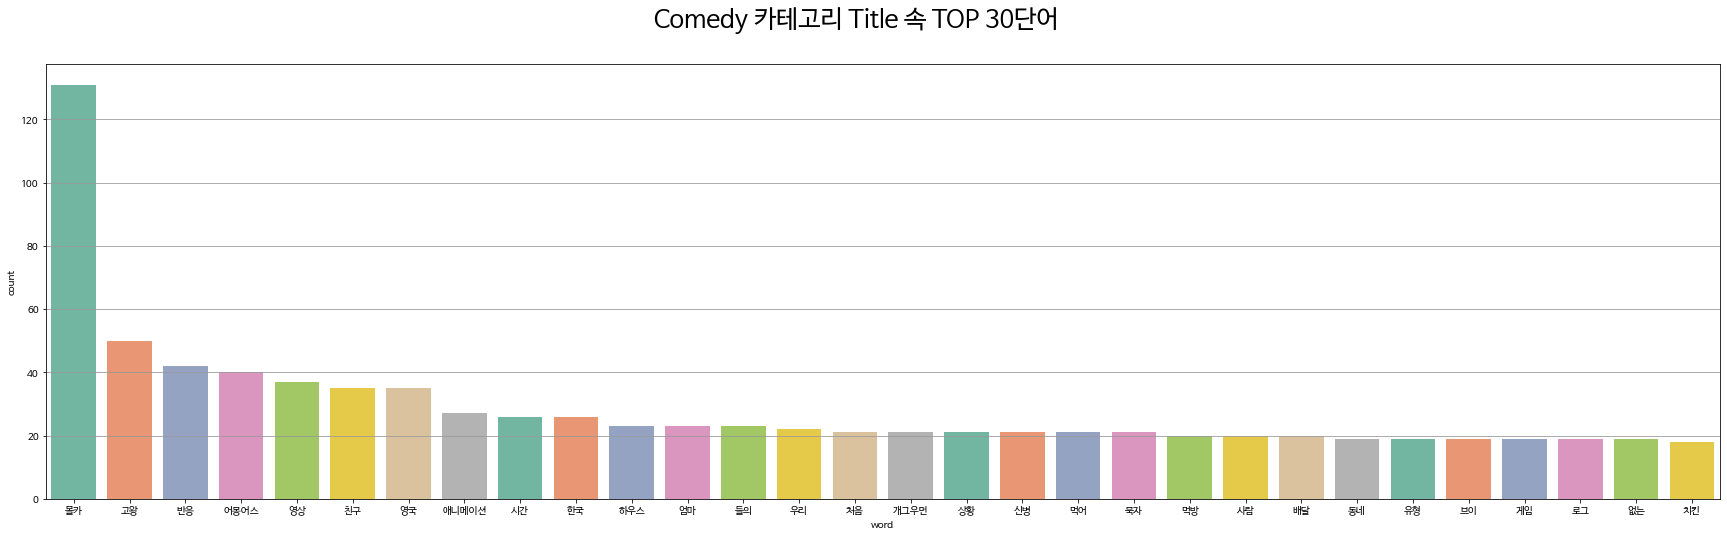

In [27]:
#plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Comedy 카테고리 Title 속 TOP 30단어', size = 25)
plt.show()

<ipython-input-28-3cdeb7f96ed5>:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


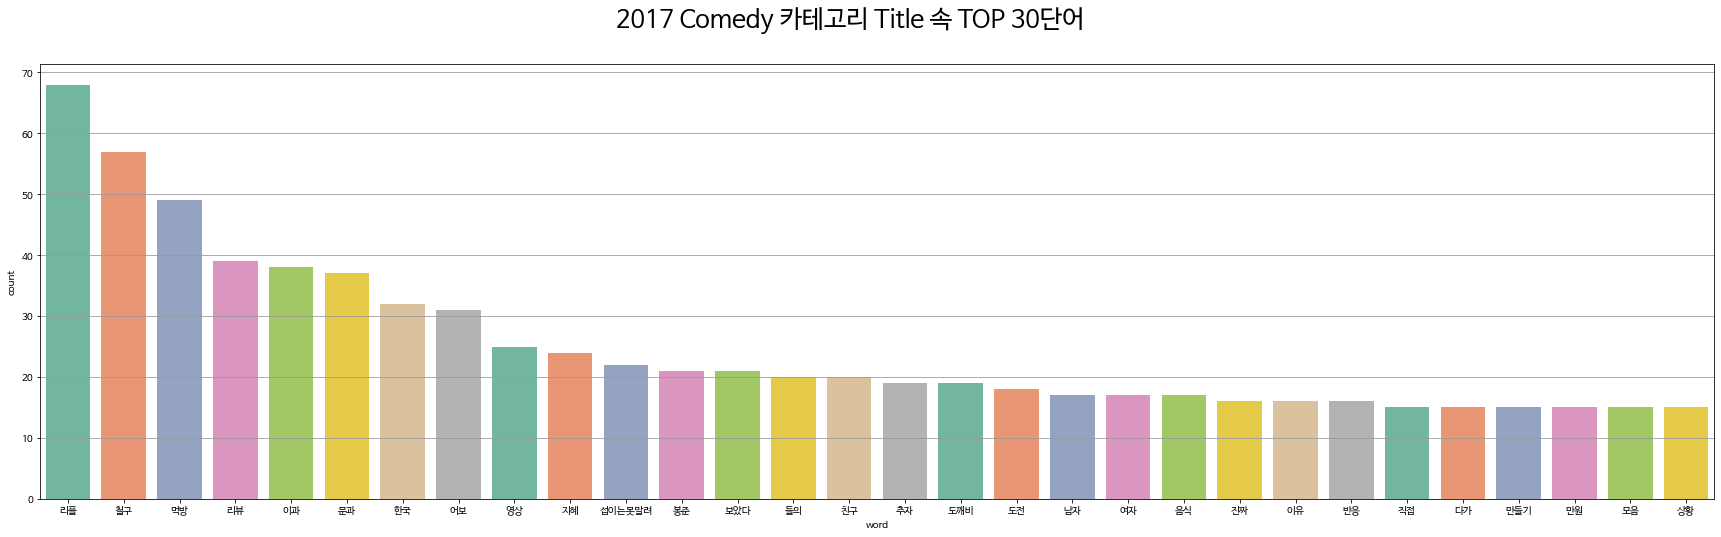

In [28]:
#plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title_2017,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('2017 Comedy 카테고리 Title 속 TOP 30단어', size = 25)
plt.show()

<ipython-input-29-d9f08524cc8a>:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


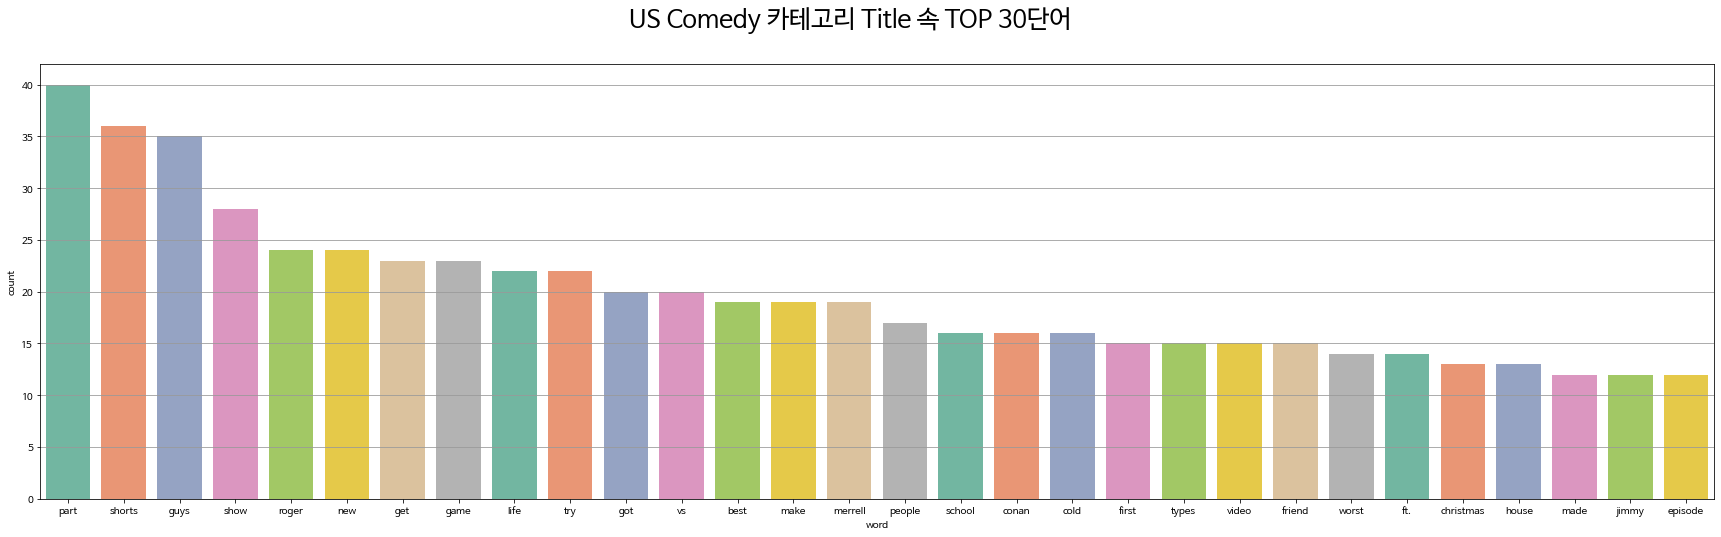

In [29]:
#plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title_us,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('US Comedy 카테고리 Title 속 TOP 30단어', size = 25)
plt.show()

# tag 분석

In [30]:
#titles을 모두 한 리스트에 담는 과정입니다.
tags=[]
tags_2017 = []
tags_us = []


for i in range (0,len(df_entertainment)):
  tags.append(df_entertainment['tags'][i]) #요소를 하나하나씩 list에 담습니다!
for i in range (0,len(df_entertainment_2017)):
  tags_2017.append(df_entertainment_2017['tags'][i])
for i in range (0,len(df_entertainment_us)):
  tags_us.append(df_entertainment_us['tags'][i])

# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
tags = "".join(tags)
tags_2017 = "".join(tags_2017)
tags_us = "".join(tags_us)
tags_us = re.sub(r'[^\.\?\!\w\d\s]',' ',tags_us)
tags_us = tags_us.lower()
print(tags_us)

#from ckonlpy.tag import Twitter #customize  konlpy
#twitter = Twitter()

tag_pos = twitter.pos(tags)
tag_pos_2017 = twitter.pos(tags_2017)

tag_pos_us = nltk.word_tokenize(tags_us) #토큰화하기
tag_pos_us = nltk.pos_tag(tag_pos_us) #형태소 분석

when our generation gets old and hears a throwback song 5 when our generation gets old and hears a throwback song when our generation gets old and hears a throwback song 3 when our generation gets old and hears a throwback song 4 kyle exum exum bassthoven generation old kyle tiktok trap 3 little pigs kyle exum parody songs starbucks be like gooba 6ix9ine blueberry faygo lil mosey apple be like songs old belt road mama mode parents be like exumseason tiktokin kylemerrell twins twins merrell veronica merrell vanessa merrell twin comedy family friendly assumptions about us assumptions veronica vanessa ronron identical twins addressing everything addressing the drama addressing the drama with my sisterdanandriya dan and riya dan riya types of tootsie dan   riya dan and riya parents funny comedy channel best friends summer job summer job ice cream ice cream truck comedy girls trip girls best friend summer date making money in the summer girl vs girl normal girl job working girl working girl

In [31]:
tag_f = list([word for word, pos in tag_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])
tag_f_2017 = list([word for word, pos in tag_pos_2017 if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])
tag_word = []
for word, pos in tag_pos_us:
    if 'NN' in pos:
        tag_word.append(word)
    elif 'VB' in pos:
        tag_word.append(word)
    elif 'JJ' in pos:
        tag_word.append(word)
    else: pass

#stop_words_kr = ['합니다','해주세요','한다','입니다','하는','하니']
unique_tag = set(tag_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.
unique_tag_2017 = set(tag_f_2017) #중복되는 단어들을 없앤 버전이 unique_title입니다.
for word in unique_tag:
    if word in stop_words_kr or len(word) == 1:
        while word in tag_f:
            tag_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
for word in unique_tag_2017:
    if word in stop_words_kr or len(word) == 1:
        while word in tag_f_2017:
            tag_f_2017.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거

#stop_words.append('im') #이상한 거 추가해주기
unique_tag_us = set(tag_word)
for word in unique_tag_us:
    if word in stop_words or len(word) == 1:
        while word in tag_word:
            tag_word.remove(word)

c_tag = Counter(tag_f)
c_tag_2017 = Counter(tag_f_2017)
c_tag_us = Counter(tag_word)

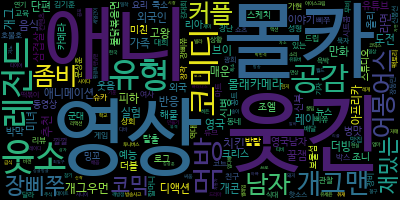

In [32]:
# 드디어 워드클라우드를 생성해보아요!
wordcloud_tag = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)
wordcloud_tag.generate_from_frequencies(c_tag)
wordcloud_tag.to_image()

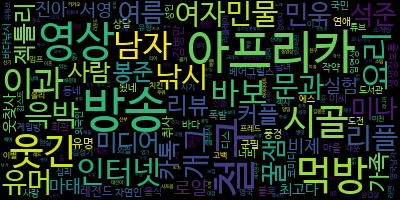

In [33]:
wordcloud_tag_2017 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)
wordcloud_tag_2017.generate_from_frequencies(c_tag_2017)
wordcloud_tag_2017.to_image()

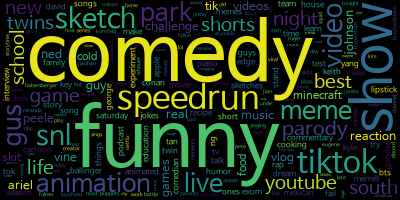

In [34]:
wordcloud_tag_us = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)
wordcloud_tag_us.generate_from_frequencies(c_tag_us)
wordcloud_tag_us.to_image()

In [35]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_tag=pd.DataFrame({
    "word":tag_f
})
tot_tag['count']=1
tot_tag=tot_tag.groupby(by=['word'],as_index=False).count()
tot_tag=tot_tag.sort_values(by='count',ascending=False).head(30)


#막대그래프로 빈도 쉽게 봅시다!!!!
tot_tag_2017 = pd.DataFrame({
    "word":tag_f_2017
})
tot_tag_2017['count']=1
tot_tag_2017 = tot_tag_2017.groupby(by=['word'],as_index=False).count()
tot_tag_2017 = tot_tag_2017.sort_values(by='count',ascending=False).head(30)

tot_tag_us = pd.DataFrame({
    "word":tag_word
})

tot_tag_us['count']=1
tot_tag_us = tot_tag_us.groupby(by=['word'],as_index=False).count()
tot_tag_us = tot_tag_us.sort_values(by='count',ascending=False).head(30)
tot_tag_us

,word,count
1063,comedy,675
2126,funny,658
4937,show,246
5147,speedrun,240
5589,tiktok,214
5075,snl,161
5003,sketch,161
5904,video,155
3474,meme,144
2392,gus,139


In [36]:
tot_tag_2017

,word,count
1042,방송,425
1623,아프리카,424
2387,철구,381
1788,영상,341
836,먹방,294
1880,웃긴,253
1507,시골,235
1981,이과,208
1853,요리,195
406,남자,187


In [37]:
tot_tag

,word,count
1689,웃긴,285
1598,영상,279
760,몰카,271
1478,애니,261
1690,웃소,179
591,레전드,163
1745,유형,161
2292,코미디,154
125,공감,145
722,먹방,141


<ipython-input-38-995e757e47be>:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


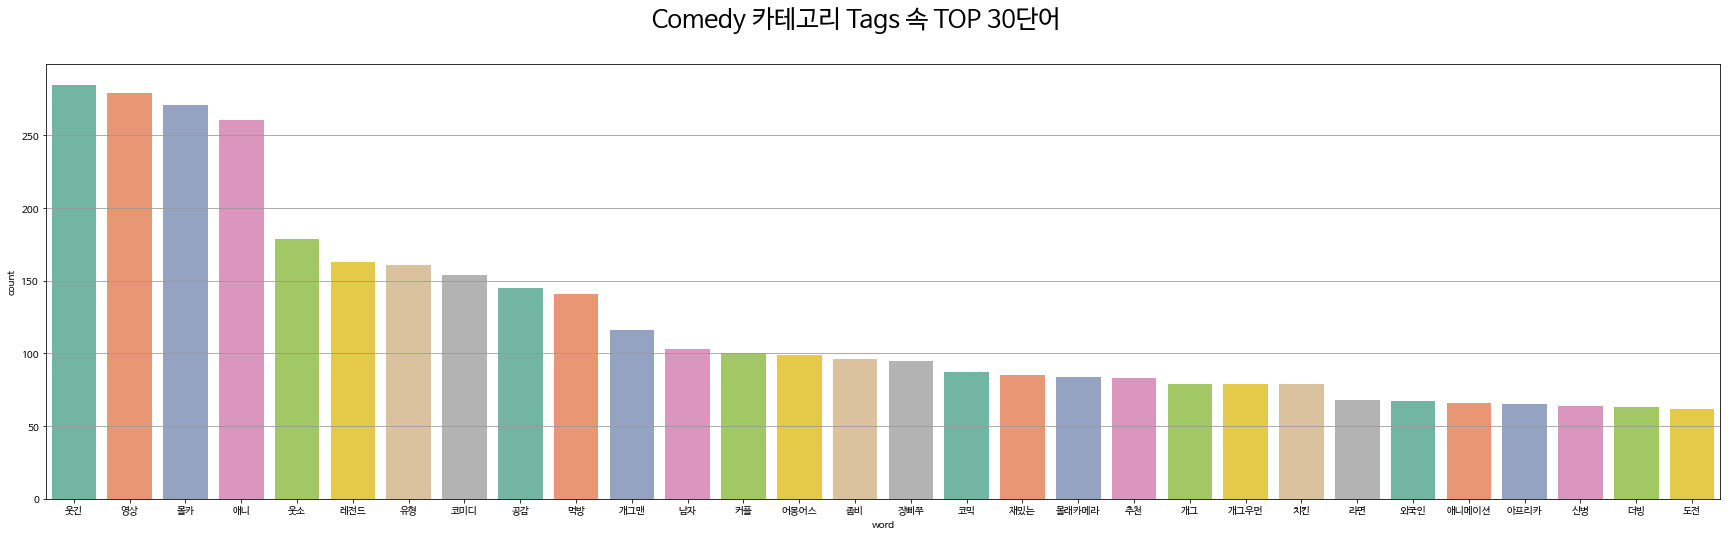

In [38]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_tag,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Comedy 카테고리 Tags 속 TOP 30단어', size = 25)
plt.show()

<ipython-input-39-9f0332099271>:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


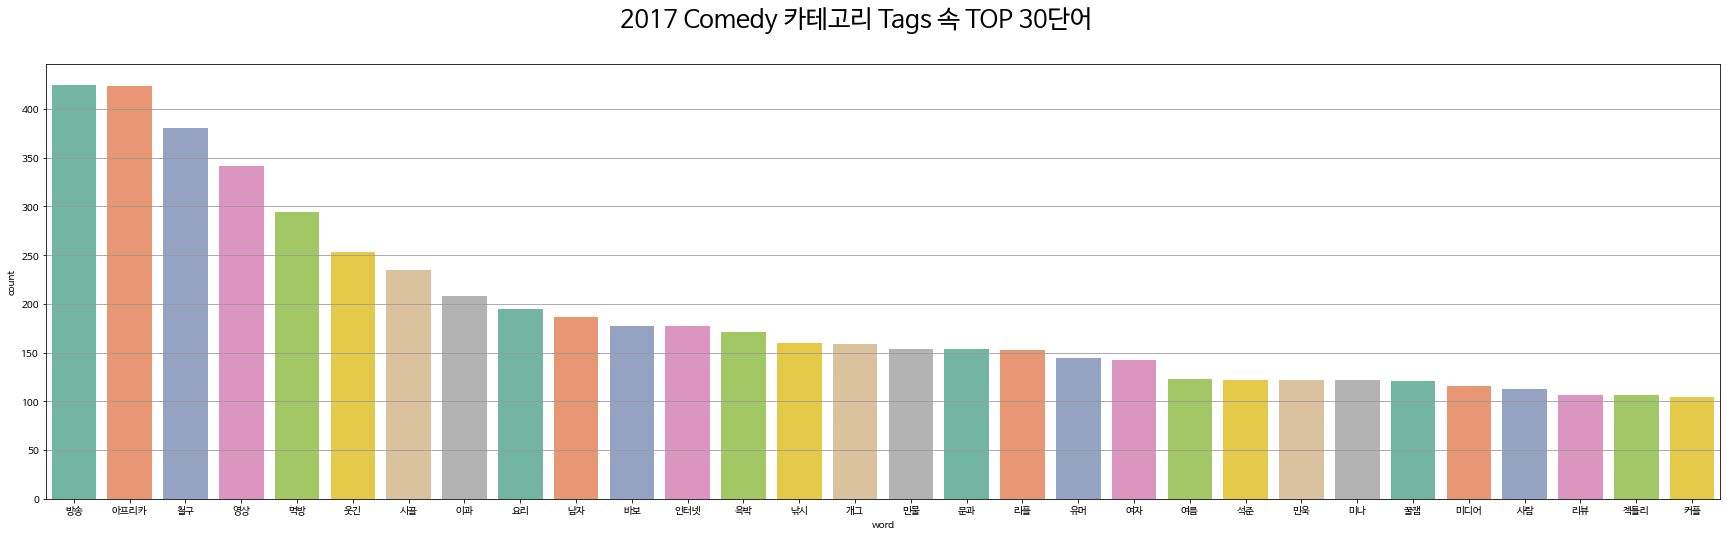

In [39]:
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_tag_2017,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('2017 Comedy 카테고리 Tags 속 TOP 30단어', size = 25)
plt.show()

<ipython-input-40-e78364ba94c3>:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


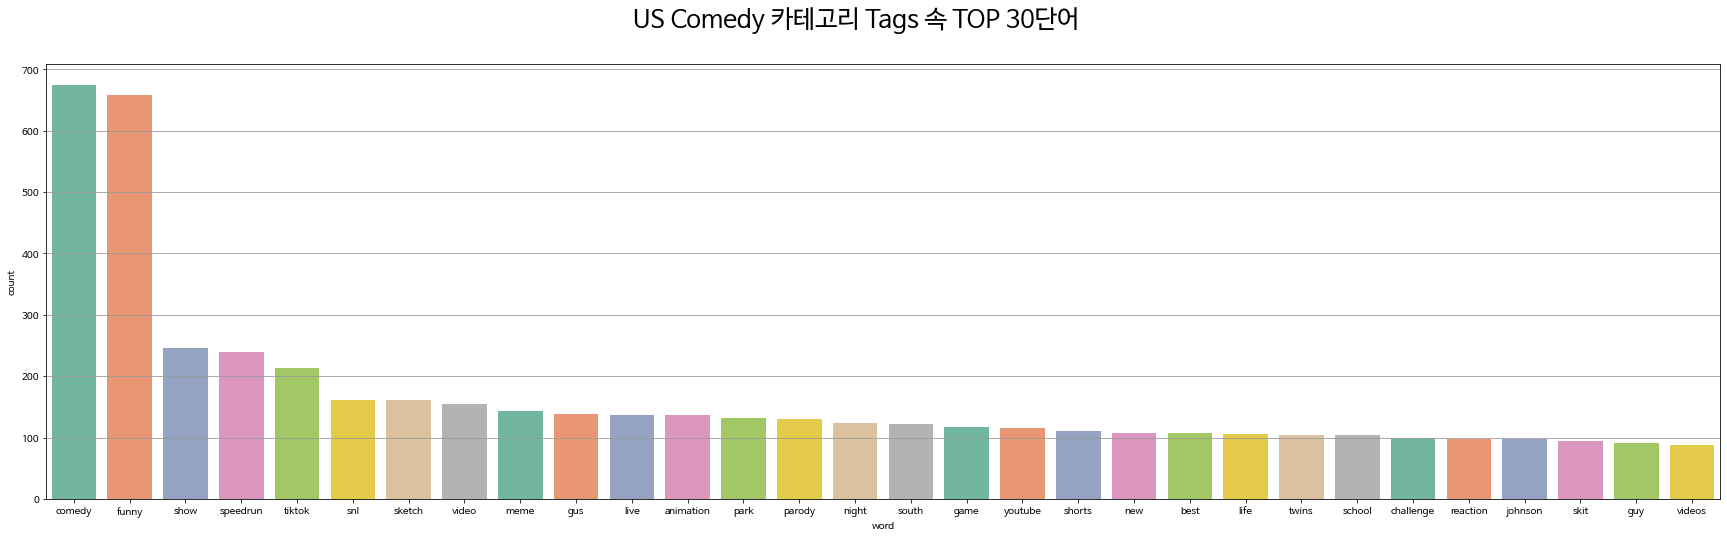

In [40]:
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_tag_us,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('US Comedy 카테고리 Tags 속 TOP 30단어', size = 25)
plt.show()